In [17]:
import numpy as np

data = np.array([0, 1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1, 0])
data



array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0])

In [18]:
10 % 3

1

In [19]:
data = np.pad(data.astype(float),(0, (3 - data.size%3)%3), constant_values=np.nan)
data

array([ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  0., nan, nan])

In [22]:
reshaped = data.reshape(-1, 3)
reshaped

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 0., nan, nan]])

In [23]:
bin_count=np.sum(reshaped, axis=1)
bin_count

array([ 1.,  1.,  0.,  1.,  3.,  3.,  0.,  0.,  1.,  2., nan])

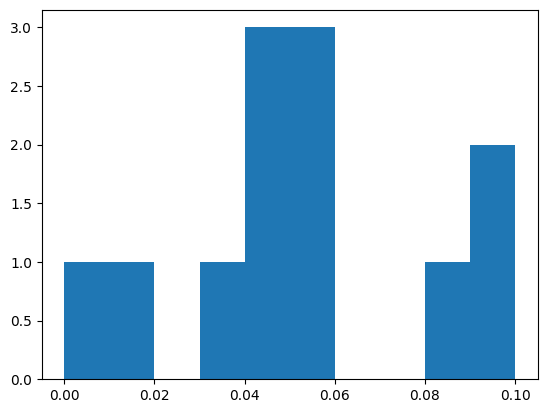

In [27]:
import matplotlib.pyplot as plt
plt.stairs(bin_count, np.arange(bin_count.size+1)/100, fill=True)

In [28]:
import xarray as xr

In [45]:
continuous_data = {k: xr.DataArray(np.random.random(500), dims="t", coords=dict(t=np.arange(500)/100)) for k in ["n1", "n2", "n3"]}
events = xr.DataArray((np.random.random(20) * 500).astype(int), dims="evs")
event_windows = xr.DataArray(np.arange(-5, 6), dims="window_i")
selection = events + event_windows
continuous_data, selection, events

({'n1': <xarray.DataArray (t: 500)> Size: 4kB
  array([0.64151998, 0.11935353, 0.93233629, 0.17036388, 0.24137814,
         0.13603894, 0.36822156, 0.32957664, 0.49687696, 0.11960305,
         0.64931337, 0.23944104, 0.16940113, 0.92983864, 0.19288935,
         0.11407213, 0.7435438 , 0.96089336, 0.58448773, 0.66805258,
         0.09235965, 0.72594746, 0.2337702 , 0.99071634, 0.76337504,
         0.29863756, 0.25300593, 0.05136323, 0.92673551, 0.15548934,
         0.79874545, 0.99232465, 0.10533196, 0.0659834 , 0.34339175,
         0.58580125, 0.79859636, 0.79015468, 0.8036076 , 0.85526992,
         0.97327858, 0.1235384 , 0.34996833, 0.68649356, 0.3492664 ,
         0.98480067, 0.20310716, 0.91393985, 0.71646704, 0.79120846,
         0.98563608, 0.18989152, 0.71607379, 0.79104769, 0.10517551,
         0.53819773, 0.78688901, 0.15467712, 0.01171007, 0.29467477,
         0.16695478, 0.86671819, 0.98092491, 0.16252902, 0.83659403,
         0.45126842, 0.59237878, 0.11210811, 0.85645776, 

In [36]:
windows = {k: a.isel(t=selection) for k,a in continuous_data.items()}
windows

{'n1': <xarray.DataArray (evs: 20, window_i: 10)> Size: 2kB
 array([[0.82334238, 0.5715438 , 0.4879435 , 0.70279375, 0.14912761,
         0.39292028, 0.47605735, 0.41456776, 0.38693701, 0.43069439],
        [0.22834064, 0.47833498, 0.47262949, 0.42930333, 0.7639865 ,
         0.56544807, 0.96698716, 0.27956477, 0.33151975, 0.47691366],
        [0.75819065, 0.84197185, 0.69915753, 0.47959867, 0.98846026,
         0.5553484 , 0.91225679, 0.96817014, 0.23632677, 0.00177726],
        [0.68969235, 0.23326345, 0.87828031, 0.42924757, 0.66561189,
         0.35983803, 0.07210184, 0.15398844, 0.89628633, 0.62145167],
        [0.87828031, 0.42924757, 0.66561189, 0.35983803, 0.07210184,
         0.15398844, 0.89628633, 0.62145167, 0.43759601, 0.43689855],
        [0.40217908, 0.89554319, 0.43137554, 0.23837575, 0.99113614,
         0.35174379, 0.55664455, 0.82372183, 0.23985277, 0.13029118],
        [0.40794569, 0.20410922, 0.6595966 , 0.0835642 , 0.73575992,
         0.21313684, 0.79731769, 0.85

In [43]:
avg = all.mean(["evs", "neuron"])
avg 

<xarray.DataArray (window_i: 10)> Size: 80B
array([0.43285307, 0.530158  , 0.53816886, 0.45391532, 0.50583875,
       0.45444879, 0.52799453, 0.5269173 , 0.42418446, 0.55053361])
Dimensions without coordinates: window_i